In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow. keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn. model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical
print(tf. __version__)



2.19.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

## Defining the Path

In [ ]:
dataset_path = '/content/drive/MyDrive/Plant-Disease-Detection-main/Dataset'


## Visualizing the images and Resize

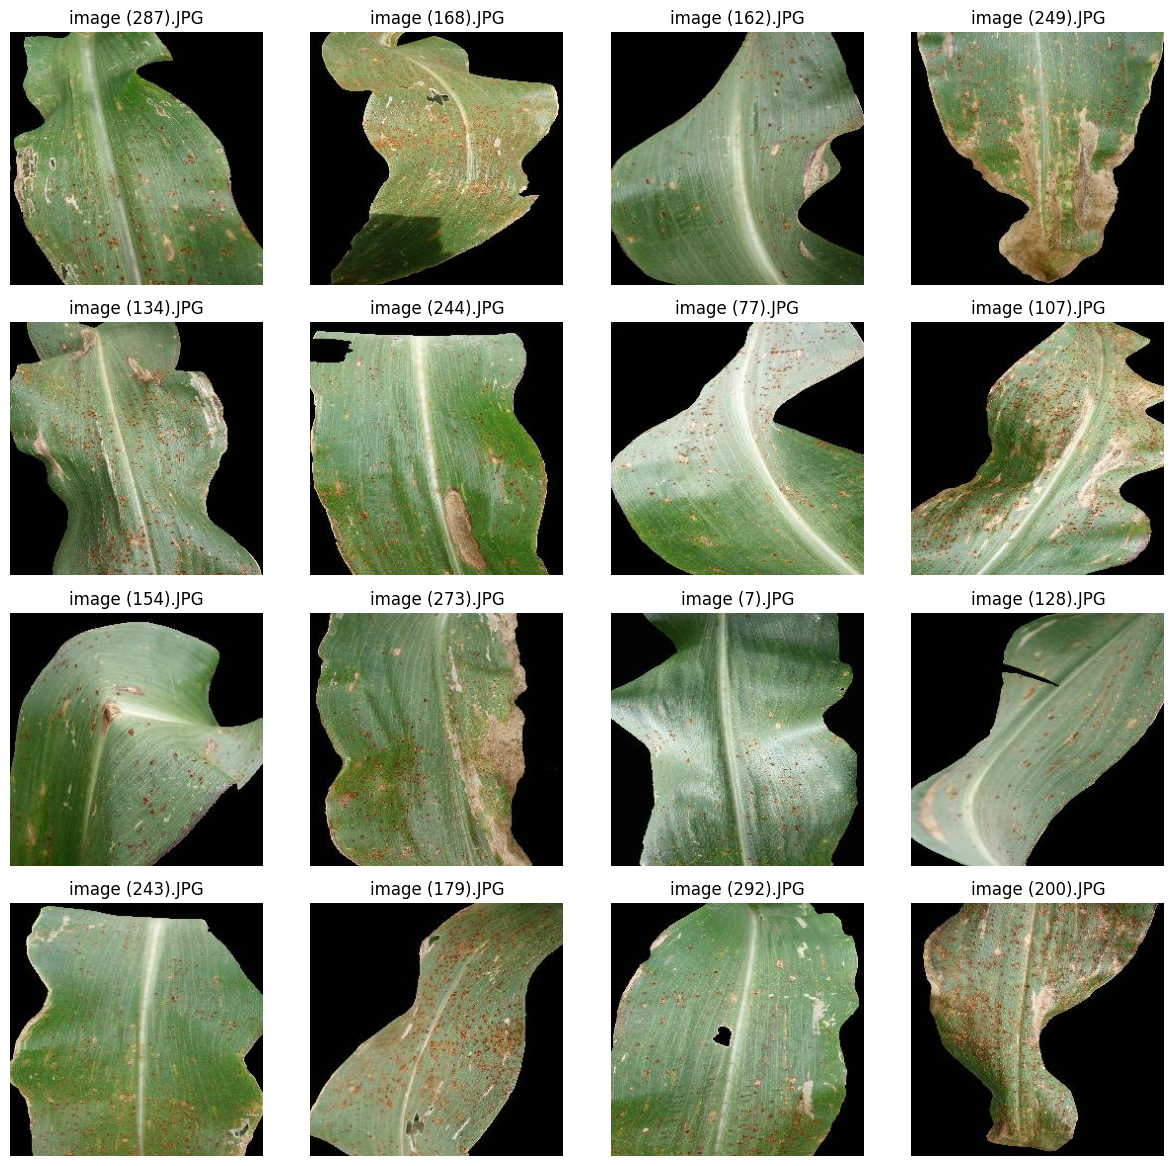

In [ ]:
import matplotlib.pyplot as plt
import random
from matplotlib.image import imread
import os

# Path to class folder
dataset_path = '/content/drive/MyDrive/Plant-Disease-Detection-main/Dataset/Corn___Common_rust'

# List of images in that folder
image_files = os.listdir(dataset_path)

# Display 16 images
plt.figure(figsize=(12, 12))
for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.tight_layout()
    img_file = random.choice(image_files)
    img = imread(os.path.join(dataset_path, img_file))
    plt.imshow(img)
    plt.title(img_file)
    plt.axis('off')


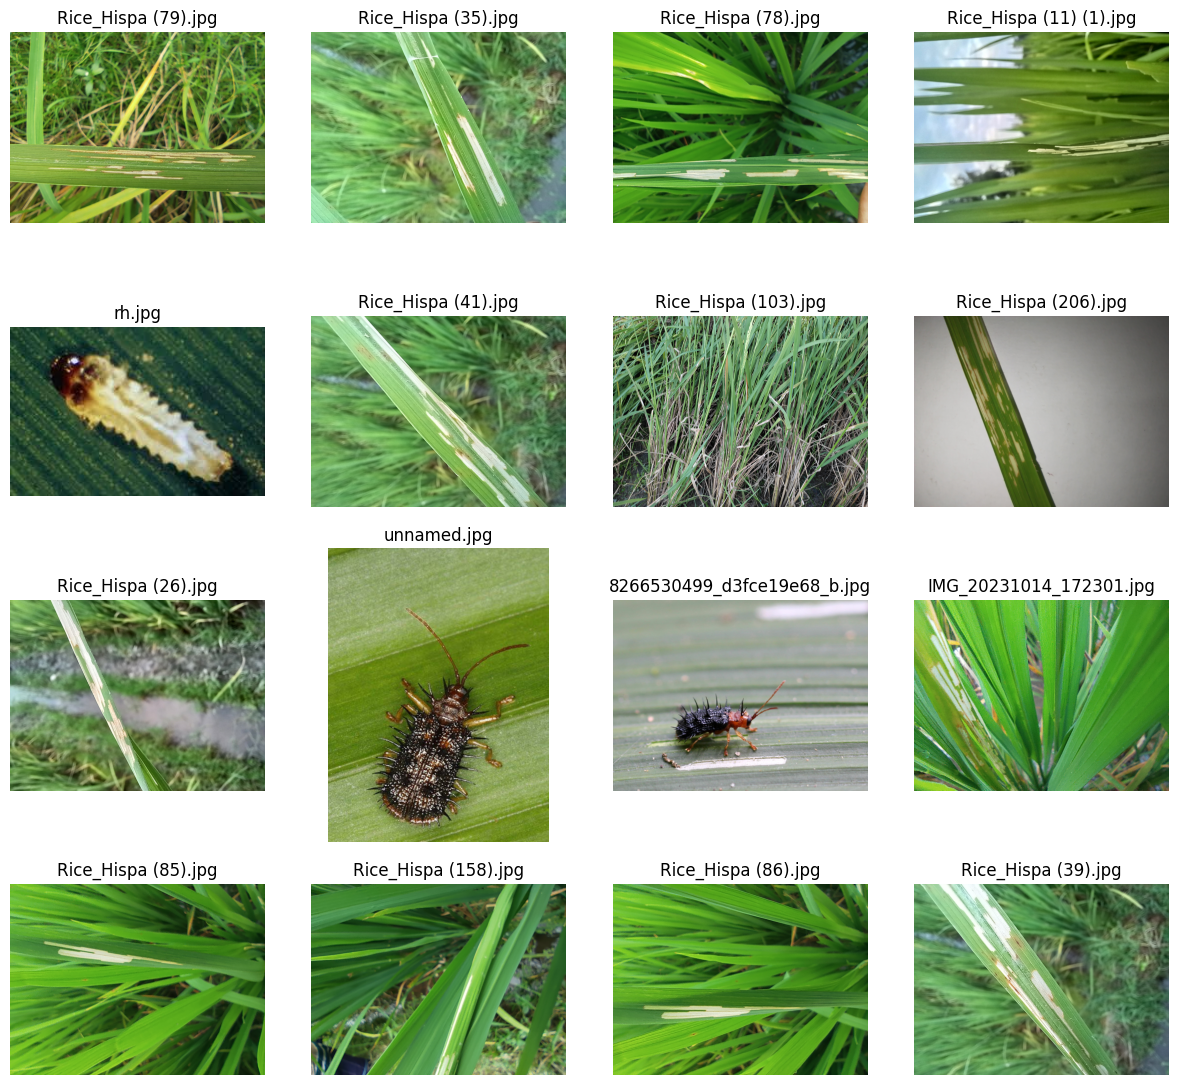

In [ ]:
import matplotlib.pyplot as plt
import random
from matplotlib.image import imread
import os

# Path to class folder
dataset_path = '/content/drive/MyDrive/Plant-Disease-Detection-main/Dataset/Rice___Hispa'

# List of images in that folder
image_files = os.listdir(dataset_path)

# Display 16 images
plt.figure(figsize=(12, 12))
for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.tight_layout()
    img_file = random.choice(image_files)
    img = imread(os.path.join(dataset_path, img_file))
    plt.imshow(img)
    plt.title(img_file)
    plt.axis('off')


## Convert the images into a Numpy array and normalize them

In [ ]:
# Converting Images to array

def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256, 256))
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
import random
import os
from os import listdir
dataset_path = "/content/drive/MyDrive/Plant-Disease-Detection-main/Dataset"
labels = os.listdir(dataset_path)


print(labels)

['Corn___Common_rust', 'Rice___Bacterialblight', 'Grape___Black_rot', 'Rice___Hispa']


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from keras.utils import img_to_array

# Set dataset path (for Google Colab)
dataset_path = "/content/drive/MyDrive/Plant-Disease-Detection-main/Dataset"

# Define all labels (ensure these match your folder names exactly)
all_labels = ['Corn___Common_rust', 'Grape___Black_rot', 'Rice___Bacterialblight','Rice___Hispa']
label_map = {label: idx for idx, label in enumerate(all_labels)}

# Initialize image and label lists
image_list = []
label_list = []

# Function to convert image to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, (256, 256))
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error loading {image_dir}: {e}")
        return None

# Load images and labels
for label_name in os.listdir(dataset_path):
    label_path = os.path.join(dataset_path, label_name)
    if label_name in label_map:
        print(f"Loading images from: {label_name}")
        for file in os.listdir(label_path):
            image_path = os.path.join(label_path, file)
            img_array = convert_image_to_array(image_path)
            if img_array.size > 0:
                image_list.append(img_array)
                label_list.append(label_map[label_name])

# Convert to NumPy arrays
image_data = np.array(image_list, dtype='float32') / 255.0
labels_data = np.array(label_list)

# ✅ Print label counts with class names
label_series = pd.Series(labels_data)
label_counts = label_series.value_counts().sort_index()
print("\n📊 Image count per class:")
for label, count in label_counts.items():
    print(f"{list(label_map.keys())[label]} ({label}): {count} images")


Loading images from: Corn___Common_rust
Loading images from: Rice___Bacterialblight
Loading images from: Grape___Black_rot
Loading images from: Rice___Hispa

📊 Image count per class:
Corn___Common_rust (0): 244 images
Grape___Black_rot (1): 244 images
Rice___Bacterialblight (2): 264 images
Rice___Hispa (3): 162 images


In [ ]:
# Next we will observe the shape of the image.

image_list[0].shape

(256, 256, 3)

In [ ]:
# Checking the total number of the images which is the length of the labels list.

label_list = np.array(label_list)
label_list.shape

(3661,)

### Splitting the dataset into train, validate and test sets

### Performing one-hot encoding on target variable

### Creating the model architecture, compile the model and then fit it using the training data

In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
from keras.utils import img_to_array, to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Dataset path
dataset_path = "/content/drive/MyDrive/Plant-Disease-Detection-main/Dataset"

# Define labels and map
all_labels = ['Corn___Common_rust', 'Grape___Black_rot', 'Rice___Bacterialblight','Rice___Hispa']
label_map = {label: idx for idx, label in enumerate(all_labels)}

# Image and label containers
image_list = []
label_list = []

# Function to convert images to arrays
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, (256, 256))
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error loading {image_dir}: {e}")
        return None

# Load images and labels
for directory in os.listdir(dataset_path):
    dir_path = os.path.join(dataset_path, directory)
    if directory in label_map:
        for file in os.listdir(dir_path):
            image_path = os.path.join(dir_path, file)
            img_array = convert_image_to_array(image_path)
            if img_array.size > 0:
                image_list.append(img_array)
                label_list.append(label_map[directory])

# Check label counts
label_series = pd.Series(label_list)
print("\n📊 Label distribution:")
for label, count in label_series.value_counts().sort_index().items():
    print(f"{all_labels[label]} ({label}): {count} images")

# Convert to arrays
image_array = np.array(image_list, dtype=np.float32) / 255.0
label_array = np.array(label_list)

# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(image_array, label_array, test_size=0.2, random_state=10)

# Convert labels to categorical
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

# Further split training data into training and validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=10)

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size=(3, 3)),
    Conv2D(16, (3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(8, activation="relu"),
    Dense(4, activation="softmax")  # 4 classes
])

model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])

# Train the model
epochs = 50
batch_size = 128

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val)
)



📊 Label distribution:
Corn___Common_rust (0): 244 images
Grape___Black_rot (1): 244 images
Rice___Bacterialblight (2): 264 images
Rice___Hispa (3): 162 images


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 85, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 85, 85, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 42, 42, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │       225,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,356 (903.73 KB)

 Trainable params: 231,356 (903.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 38s 7s/step - accuracy: 0.3508 - loss: 1.3686 - val_accuracy: 0.5918 - val_loss: 1.3135
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 37s 7s/step - accuracy: 0.6135 - loss: 1.2938 - val_accuracy: 0.7551 - val_loss: 1.2425
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 38s 6s/step - accuracy: 0.7628 - loss: 1.2164 - val_accuracy: 0.8231 - val_loss: 1.1511
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 7s/step - accuracy: 0.8199 - loss: 1.1255 - val_accuracy: 0.8776 - val_loss: 1.0556
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 7s/step - accuracy: 0.8336 - loss: 1.0297 - val_accuracy: 0.8707 - val_loss: 0.9542
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 7s/step - accuracy: 0.8403 - loss: 0.9360 - val_accuracy: 0.8844 - val_loss: 0.8578
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 35s 7s/step - accuracy: 0.8618 - loss: 0.8305 - val_accuracy: 0.8707 - val_loss: 0.7626
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 39s 7s/step - accuracy: 0.8185 - loss: 0.7595 - val_accuracy: 0.8776 - val_loss: 0.6809
Epoch 9/

In [ ]:
model.save("/content/drive/MyDrive/Plant-Disease-Detection-main/Model/plant_disease_model.h5")

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5693405725613594945
xla_global_id: -1
]
